In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('/content/food_order.csv', encoding='latin-1')
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [6]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [8]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


##Missing Values

In [9]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

<AxesSubplot:>

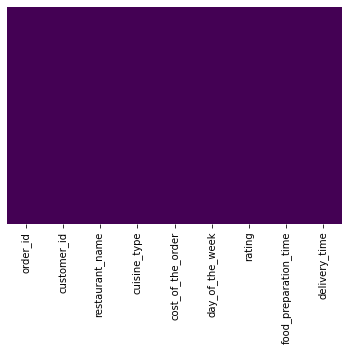

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df.rating.value_counts(1)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

In [12]:
day_delivery = df[["delivery_time", "day_of_the_week"]].groupby("day_of_the_week").mean()
print(day_delivery)

                 delivery_time
day_of_the_week               
Weekday              28.340037
Weekend              22.470022


The average delivery time is low on weekends.

In [13]:
preparation_time = df[["food_preparation_time", "day_of_the_week"]].groupby("day_of_the_week").mean()
print(preparation_time)

                 food_preparation_time
day_of_the_week                       
Weekday                      27.212066
Weekend                      27.436714


The average food preparation is almost same on weekdays and weekends.

##Analysis of oder preparation time

In [28]:
df.food_preparation_time.describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

Text(0.5, 1.0, 'Top Ten Restaurants with Fastest Food Preparation Time')

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 128 (\x80) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


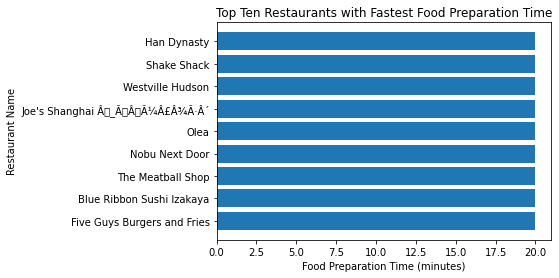

In [31]:
df_sorted = df.sort_values(by='food_preparation_time')
top_ten = df_sorted.head(10)

plt.barh(top_ten['restaurant_name'], top_ten['food_preparation_time'])
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Restaurant Name')
plt.title('Top Ten Restaurants with Fastest Food Preparation Time')

Minimum food preparation time : 20 minuites
Maximum Food preparation time : 35 minuites

##Analysis of delivery time

In [23]:
df.delivery_time.describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

In [24]:
average_meal_delivery_time = df.groupby('cuisine_type').mean()
average_meal_delivery_time = average_meal_delivery_time.reset_index('cuisine_type')
average_meal_delivery_time

,cuisine_type,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,order_completion_time
0,American,1.477489e+06,184169.683219,16.319829,27.440068,24.193493,51.633562
1,Chinese,1.477530e+06,180480.855814,16.305209,27.511628,23.855814,51.367442
2,French,1.477438e+06,158138.722222,19.793889,26.888889,25.333333,52.222222
3,Indian,1.477493e+06,162106.397260,16.919726,27.109589,24.082192,51.191781
4,Italian,1.477528e+06,159568.305369,16.418691,27.483221,24.567114,52.050336
5,Japanese,1.477485e+06,161493.955319,16.304532,27.510638,24.131915,51.642553
6,Korean,1.477426e+06,226702.000000,14.001538,25.461538,20.923077,46.384615
7,Mediterranean,1.477483e+06,115908.130435,15.474783,27.000000,23.586957,50.586957
8,Mexican,1.477446e+06,181453.545455,16.933117,26.727273,24.389610,51.116883
9,Middle Eastern,1.477412e+06,168839.938776,18.820612,26.673469,24.081633,50.755102


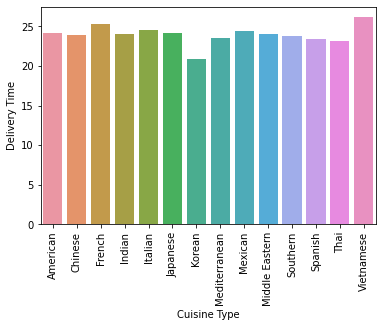

In [25]:
average_meal_delivery_time_plot = sns.barplot(x='cuisine_type', y='delivery_time', data=average_meal_delivery_time)
plt.setp(average_meal_delivery_time_plot.get_xticklabels(), rotation=90)
average_meal_delivery_time_plot.set(xlabel='Cuisine Type', ylabel='Delivery Time')
plt.show()

In [27]:

print('Minimum delivery time :',min(df['delivery_time']))
print('Maximum delivery time :',max(df['delivery_time']))
print('Average delivery time :',mean(df['delivery_time']))

print(df.sort_values('delivery_time').head(5))

Minimum delivery time : 15
Maximum delivery time : 33
Average delivery time : 24.161749209694417
      order_id  customer_id           restaurant_name    cuisine_type  \
424    1477066       376381               Shake Shack        American   
658    1477544       113972            RedFarm Hudson         Chinese   
241    1476789       103005  Yama Japanese Restaurant        Japanese   
1088   1476834       176622              Cafe Mogador  Middle Eastern   
1776   1477694       192317               Shake Shack        American   

      cost_of_the_order day_of_the_week     rating  food_preparation_time  \
424                8.25         Weekend  Not given                     30   
658               19.35         Weekend          4                     31   
241               17.08         Weekend          5                     28   
1088               9.22         Weekend  Not given                     23   
1776              24.30         Weekend          4                     25   

 

Minimum delivery time is 15,   
Maximum delivery time is 33,  
Average delivery time is 24.161749209694417

##Analysis of order completion time

In [17]:
df['order_completion_time'] = df['food_preparation_time'] + df['delivery_time']
print(df.sort_values('order_completion_time').head(5))


      order_id  customer_id               restaurant_name cuisine_type  \
1536   1478266       297413             The Meatball Shop      Italian   
1720   1478070       129206              RedFarm Broadway      Chinese   
1436   1477878        62730              Westville Hudson     American   
432    1477737       104548  Tarallucci e Vino Restaurant      Italian   
1093   1477739        63096                      Rubirosa      Italian   

      cost_of_the_order day_of_the_week     rating  food_preparation_time  \
1536              16.10         Weekend  Not given                     20   
1720              14.07         Weekend          3                     20   
1436              21.88         Weekend          5                     20   
432               11.59         Weekend  Not given                     21   
1093              12.51         Weekend          5                     21   

      delivery_time  order_completion_time  
1536             15                     35  
17

The Meatball Shop,RedFarm Broadway, Westville Hudson have the minimum order completion time which is 35 minuites.

In [18]:
print(df['order_completion_time'].mean())
print(df['order_completion_time'].max())

51.53371970495258
68


The average order completion time is 51 minuites and the maximum order completion time is 68 minuites 

To find the ratings of the restaurants based on the cuisine. First remove the restaurants whose rating is not given. Plot remaining restaurants based on their ratings and cuisine type.

Analysis of restaurants based on ratings

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Mexican'),
  Text(1, 0, 'American'),
  Text(2, 0, 'Indian'),
  Text(3, 0, 'Mediterranean'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Japanese'),
  Text(6, 0, 'Middle Eastern'),
  Text(7, 0, 'Italian'),
  Text(8, 0, 'Thai'),
  Text(9, 0, 'Southern'),
  Text(10, 0, 'Spanish'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Korean'),
  Text(13, 0, 'Vietnamese')])

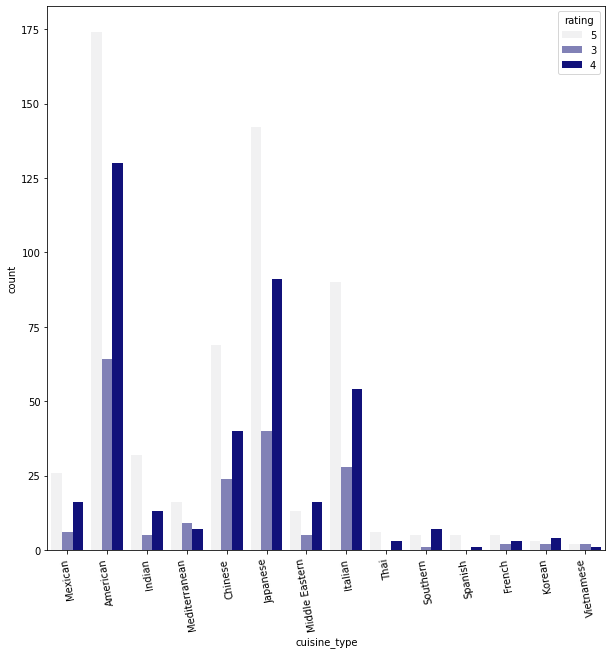

In [19]:
df_s = df[df['rating'] != 'Not given']

plt.figure(figsize = (10,10))
x = sns.countplot(x = 'cuisine_type', hue = 'rating', data = df_s, color = 'darkblue')
plt.xticks(rotation = 100)

From the above plot,American,Japanese and Italian restaurants have maximum number of high ratings. 

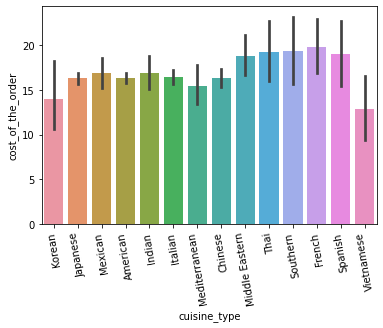

In [20]:
chart = sns.barplot(x = 'cuisine_type', y = 'cost_of_the_order',data = df)
plt.xticks(rotation = 100)
plt.show()

In [21]:
df.shape

(1898, 10)

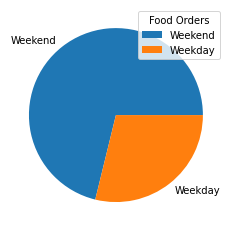

In [22]:
y = np.array(df["day_of_the_week"].value_counts())


ylabels = ["Weekend", "Weekday"]
plt.pie(y, labels = ylabels)
plt.legend(title = "Food Orders")
plt.show() 

There are more food orders on weekends than weekdays.

In [32]:
df.cuisine_type.value_counts()
df.groupby('cuisine_type')['cost_of_the_order'].mean()

cuisine_type
American          16.319829
Chinese           16.305209
French            19.793889
Indian            16.919726
Italian           16.418691
Japanese          16.304532
Korean            14.001538
Mediterranean     15.474783
Mexican           16.933117
Middle Eastern    18.820612
Southern          19.300588
Spanish           18.994167
Thai              19.207895
Vietnamese        12.882857
Name: cost_of_the_order, dtype: float64

#Evaluation

###What is the average meal preparation time?
The average meal preparation time is 27 minuites which is almost same on Weekdays and on weekends.

###What is the fastest time in preparing a meal?
The minimum preparation time is 20 minuites and many restaurant has it.

###What is the maximum preparation time?
The maximum food prepataion time is 35 minuites

###What is the quickest delivery time?
The minimum food delivery time is 15 minuites.
Shake Shack,RedFarm Hudson,Westville Hudson,Yama Japanese Restaurant has minimum delivery time.

###What is the worst case possibilty in terms of time for delivery?
The maximum food delivery time is 33 minuites

###What is the average delivery time?
The maximum food delivery time is 24 minuites

###On an average how much time before should I order my food?
The average order completion time is 51 minuites.

###What is the maximum order completion time?
the maximum order completion time is 68 minuites 

###If you are too hungry which restaurant will be the fastest? and how much time?
You can order from these 3 restaurants The Meatball Shop,RedFarm Broadway, Westville Hudson which will take upto 35 minuites.

###On weekdays or weekends when restaurant should not be closed?
On weekends the orders are more hence restaurants should not be closed on weekends.

###Which cuisine should one order when he/she is too hungry?
Korean. Because it takes least completion time.

###Which cuisine is highly rated?
American Japanese and Italian cuisines are highly rated

###Minimum how much money would one need to have food?
One should have atleast $13 and he/she can have Vietnamese food because It costs the minimum.


